<a href="https://colab.research.google.com/github/Maveras71/Relat-rioT-cnico/blob/main/Relat%C3%B3rio%20T%C3%A9cnico%3A%20Implementa%C3%A7%C3%A3o%20e%20An%C3%A1lise%20do%20Algoritmo%20de%20Regress%C3%A3o%20Lineare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relatório Técnico: Implementação e Análise do Algoritmo de Regressão Linear
Grupo 11
Renan Araujo Santiago

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d


### Experimentos com K-means

Neste notebook iremos testar o algoritmo k-means. Utilizaremos a biblioteca do sklearn. Faremos 2 experimentos:

- No primeiro, iremos utilizar o dataset iris e iremos clusterizar o mesmo. Então compararemos com os rótulos das classes que temos

- No segundo experimento, geratemos um dataset artificial com várias classes e observaremos os aspectos geométricos do k-means


- Esta é uma função auxiliar para plotarmos datasets e seus centros

In [ ]:
def plotDC(Ds, Cs, colors, ms=20, mc='k'):
    i = 1
    for D, C, color in zip(Ds, Cs, colors):
        plt.plot(D[:,0], D[:,1],'.',color=color)
        plt.plot(C[:,0], C[:,1],'o',color=color,markersize=ms)
        i += 1

# Experimento 1

- Carregamos o dataset iris

In [ ]:
D_iris = sns.load_dataset('iris')

- Aqui separamos o dataset apenas para ilustrar e comparar. Lembrem que o k-means não irá utliizar o dataset separado nem os rótulos

In [ ]:
D_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
D1 = D_iris.query('species=="setosa"').to_numpy()[:,:4].astype(np.float32)
D2 = D_iris.query('species=="versicolor"').to_numpy()[:,:4].astype(np.float32)
D3 = D_iris.query('species=="virginica"').to_numpy()[:,:4].astype(np.float32)

In [ ]:
# convertendo para numpy array
D = D_iris.to_numpy()[:,:4].astype(np.float32)

- Aqui rodamos o kmeans com 3 centros inicializando os pontos aleatoriamente no dataset

In [ ]:
kmeans = KMeans(n_clusters=3, init="random").fit(D)
C = kmeans.cluster_centers_

In [ ]:
C

array([[6.85      , 3.0736842 , 5.7421055 , 2.0710526 ],
       [5.006     , 3.428     , 1.4619999 , 0.24600005],
       [5.9016128 , 2.748387  , 4.3935485 , 1.4338709 ]], dtype=float32)

- plotando o resultado. Como o conjunto iris tem 4 dimensões, plotamos várias combinações

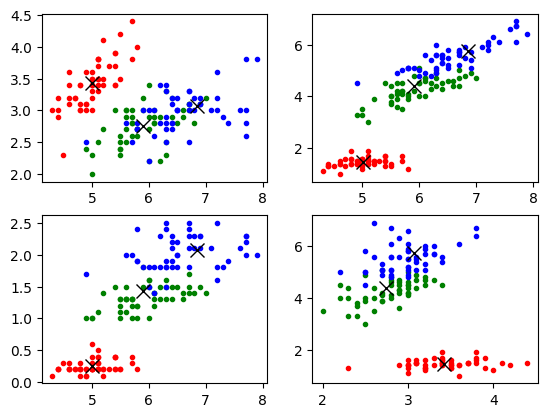

In [ ]:
plt.subplot(2,2,1)
plt.plot(D1[:,0], D1[:,1],'r.')
plt.plot(D2[:,0], D2[:,1],'g.')
plt.plot(D3[:,0], D3[:,1],'b.')
plt.plot(C[:,0], C[:,1],'kx',markersize=10)

plt.subplot(2,2,2)
plt.plot(D1[:,0], D1[:,2],'r.')
plt.plot(D2[:,0], D2[:,2],'g.')
plt.plot(D3[:,0], D3[:,2],'b.')
plt.plot(C[:,0], C[:,2],'kx',markersize=10)

plt.subplot(2,2,3)
plt.plot(D1[:,0], D1[:,3],'r.')
plt.plot(D2[:,0], D2[:,3],'g.')
plt.plot(D3[:,0], D3[:,3],'b.')
plt.plot(C[:,0], C[:,3],'kx',markersize=10)

plt.subplot(2,2,4)
plt.plot(D1[:,1], D1[:,2],'r.')
plt.plot(D2[:,1], D2[:,2],'g.')
plt.plot(D3[:,1], D3[:,2],'b.')
plt.plot(C[:,1], C[:,2],'kx',markersize=10)



# Experimento 2

- Gerando 6 clusters em posições aleatórias

In [ ]:
N = 100
a = 5.0


C1 = a*np.random.randn(1,2)
D1 = np.array([[x[0]+C1[0,0], x[1]+C1[0,1]] for x in np.random.randn(N,2)])

C2 = a*np.random.randn(1,2)
D2 = np.array([[x[0]+C2[0,0], x[1]+C2[0,1]] for x in np.random.randn(N,2)])

C3 = a*np.random.randn(1,2)
D3 = np.array([[x[0]+C3[0,0], x[1]+C3[0,1]] for x in np.random.randn(N,2)])

C4 = a*np.random.randn(1,2)
D4 = np.array([[x[0]+C4[0,0], x[1]+C4[0,1]] for x in np.random.randn(N,2)])

C5 = a*np.random.randn(1,2)
D5 = np.array([[x[0]+C5[0,0], x[1]+C5[0,1]] for x in np.random.randn(N,2)])

C6 = a*np.random.randn(1,2)
D6 = np.array([[x[0]+C6[0,0], x[1]+C6[0,1]] for x in np.random.randn(N,2)])


- Para rodar o k-means, concatenamos todos. Lembrando: o kmeans não tem a informação dos clueters separados

In [ ]:
D = np.concatenate((D1, D2, D3, D4, D5, D6))

- Rodamos o k-means

In [ ]:
kmeans = KMeans(n_clusters=6, init="random").fit(D)

C = kmeans.cluster_centers_

- Plotamos o resultados.

Aqui utlizamos uma função para gerar o diagrama de Voronoi para verificarmos os limites dos centros

- Uma observação importante!

Observem as cores dos clusters. Embora tenhamos usado as mesmas cores na mesma sequência. As cores dos centros do k-means estão diferentes (embora a posição esteja correta)

In [ ]:
vor = Voronoi(C)

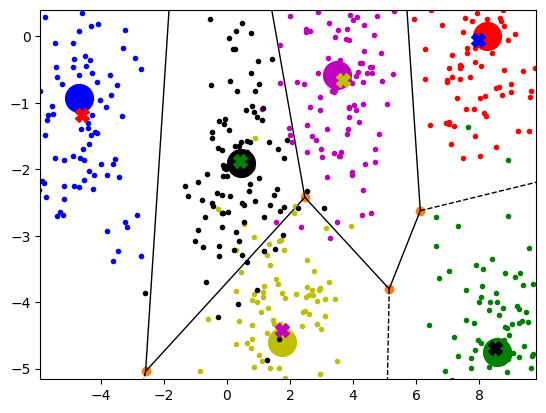

In [ ]:
colors = ['r','g','b','y','m','k']

voronoi_plot_2d(vor)

C = kmeans.cluster_centers_
plotDC((D1, D2, D3, D4, D5, D6),(C1, C2, C3, C4, C5, C6),colors)

for i in range(6):
    plt.plot(C[i,0], C[i,1],'X',color=colors[i],markersize=10)